In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX - DATA COMPOSITION 4 (Fixed Set Test).csv', index_col="Monthly", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
Monthly,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,11,59,32,8,58,7,69,...,27,58,29,18,20,0,32,0,8,Train
2008-01-02,411032,357,3211,0,51,0,0,46,6,61,...,27,58,31,10,19,5,39,7,5,Train
2008-01-03,414332,344,3153,0,57,7,24,58,6,61,...,27,50,29,38,28,6,30,0,0,Train
2008-01-04,395900,338,3184,0,51,6,9,58,6,66,...,27,41,30,25,22,8,45,0,8,Train
2008-01-05,366387,369,2964,0,57,0,7,57,6,63,...,27,44,24,16,22,5,47,0,9,Train


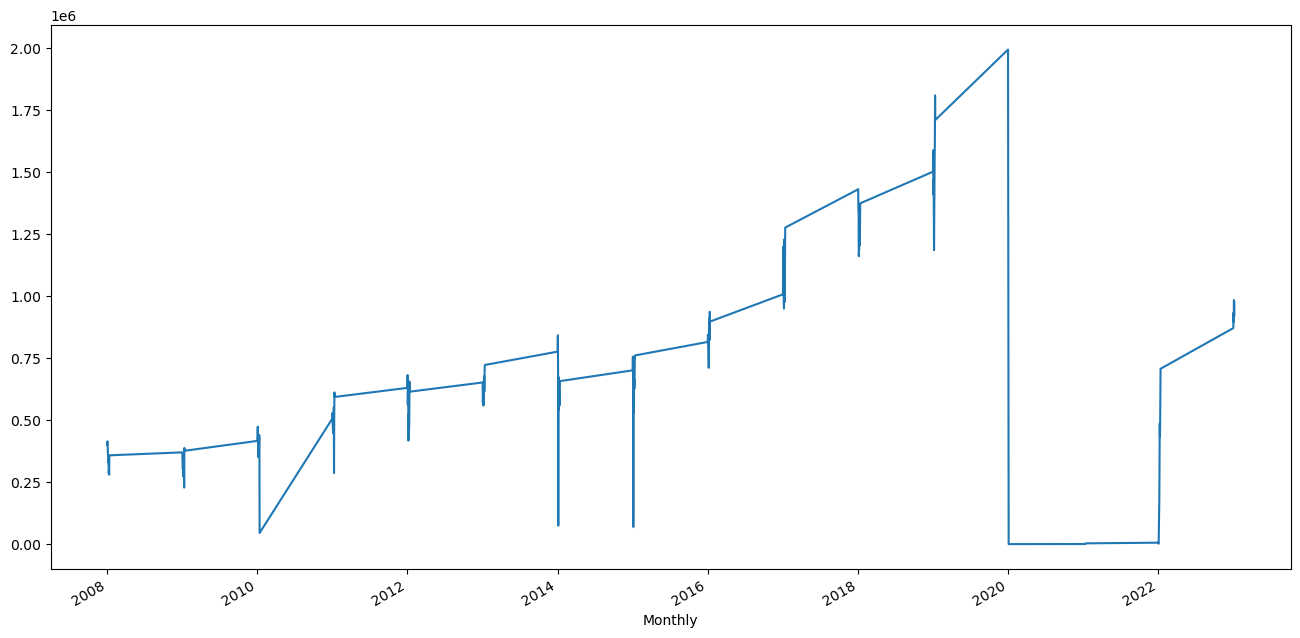

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Monthly                                                            
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            Airbnb Vietnam  Vietnam restaurant  Shopping in Hanoi  \
Monthly                                       

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5062.559, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5058.682, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5059.447, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5059.222, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5056.726, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5057.622, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5057.310, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5058.795, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5060.456, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5060.497, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5062.493, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.099 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/01/2021'].dropna()
test = df1['Tourist Arrival']['01/04/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/01/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/04/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(0,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50004D+01    |proj g|=  6.21543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      0      1      0     0     0   6.215D-07   1.500D+01
  F =   15.000354993969603     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Tourist Arrival   No. Observations:                  157
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2355.056
Date:                Wed, 23 Aug 2023   AIC                           4754.111
Time:                        21:27:18   BIC                           4821.067
Sample:                             0   HQIC                          4781.307
                                - 157                                         
Covariance Type:                  opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number of Posts           109.2948   4.56e+04      0.002      0.998   -8.93e+04    8.95e+04
Number of Comments         30.5359   5150.129      0.006      0.995   -1.01e+04    1.01e+04
Airbnb Vietnam           -887.1251    2.7e+05     -0.003      0.997   -5.31e+05    5.29e+05
Vietnam restaurant       2395.1578   3.96e+05      0.006      0.995   -7.73e+05    7.78e+05
Shopping in Hanoi         595.8087   4.29e+05      0.001      0.999   -8.39e+05    8.41e+05
Shopping in Ho Chi Minh   836.2845   4.48e+05      0.002      0.999   -8.78e+05     8.8e+05
 Vietnam tour            2654.2839   6.68e+05      0.004      0.997   -1.31e+06    1.31e+06
 Skyscanner              6721.7182   4.53e+05      0.015      0.988   -8.82e+05    8.95e+05
 Vietnam visa            3921.9956   4.69e+05      0.008      0.993   -9.15e+05    9.23e+05
 Vietnam airport         -902.1181   5.84e+05     -0.002      0.999   -1.14e+06    1.14e+06
 Vietnam flights        -2239.6495   5.53e+05     -0.004      0.997   -1.09e+06    1.08e+06
 Danang airport           564.0259    2.3e+05      0.002      0.998    -4.5e+05    4.51e+05
 Hoi An                 -2071.6077   2.66e+05     -0.008      0.994   -5.23e+05    5.19e+05
 Vietnam weather           19.5851   3.16e+05   6.19e-05      1.000    -6.2e+05     6.2e+05
 Visa for Vietnam        1694.6485   6.62e+05      0.003      0.998    -1.3e+06     1.3e+06
 Sgn airport             1622.9028   3.23e+05      0.005      0.996   -6.31e+05    6.35e+05
 Phu Quoc                2959.9686    2.5e+05      0.012      0.991   -4.88e+05    4.94e+05
 Vietnam itinerary      -2217.8260   3.68e+05     -0.006      0.995   -7.24e+05     7.2e+05
 Vietnam trip            4336.5056   3.33e+05      0.013      0.990   -6.49e+05    6.57e+05
 Things to do in Hue     4237.4668   4.66e+05      0.009      0.993   -9.09e+05    9.18e+05
 Vietnam backpackers    -6209.0848    4.6e+05     -0.014      0.989   -9.07e+05    8.95e+05
sigma2                    2.49e+12      0.006   3.91e+14      0.000    2.49e+12    2.49e+12
===================================================================================
Ljung-Box (L1) (Q):                  17.55   Jarque-Bera (JB):               150.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.04
Prob(H) (two-sided):                  0.47   Kurtosis:                         7.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+32. Standard errors may be unstable.
"""

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 333396.7511775241


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 262891.9147192827


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.3540413408567765e+20


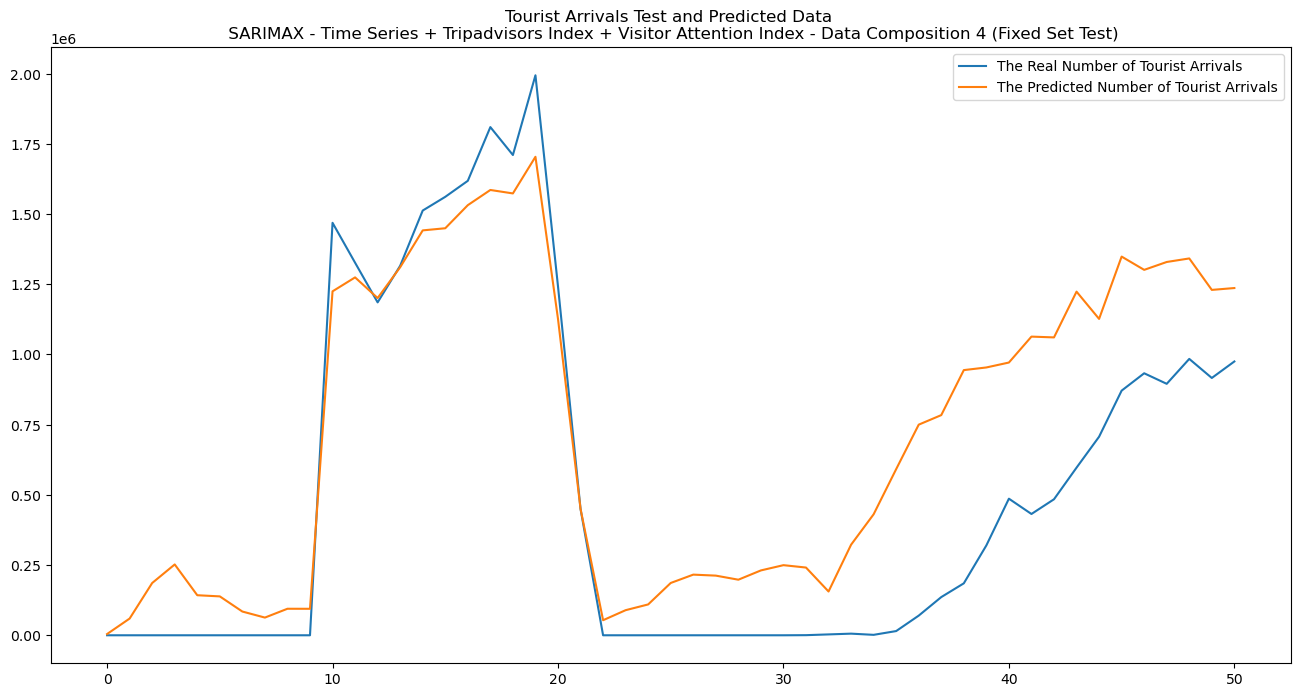

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Visitor Attention Index - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()